# 2. Median filtering

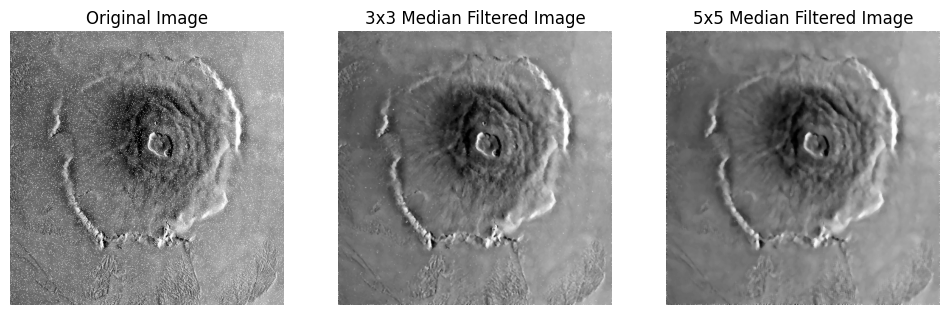

In [7]:
#Importing the required libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Loading the noisy image
image = Image.open("olympus_noisy.png")
image = image.convert("L")  # Convert to grayscale

# Converting the image to a numpy array
image_array = np.array(image)

# Function to perform median filtering with a specified kernel size

def median_filter(image, kernel_size):
    filtered_image = np.copy(image)
    rows, cols = image.shape
    half_kernel = kernel_size // 2

    for i in range(half_kernel, rows - half_kernel):
        for j in range(half_kernel, cols - half_kernel):
            neighborhood = image[i - half_kernel:i + half_kernel + 1, j - half_kernel:j + half_kernel + 1]
            median_value = np.median(neighborhood)
            filtered_image[i, j] = median_value

    return filtered_image

# Applying median filtering with 3x3 and 5x5 filters
filtered_image_3x3 = median_filter(image_array, kernel_size=3)
filtered_image_5x5 = median_filter(image_array, kernel_size=5)

# Converting the filtered numpy arrays back to PIL images
filtered_image_3x3_pil = Image.fromarray(filtered_image_3x3)
filtered_image_5x5_pil = Image.fromarray(filtered_image_5x5)

# Saving the filtered images as PNG files
filtered_image_3x3_pil.save("filtered_3x3.png")
filtered_image_5x5_pil.save("filtered_5x5.png")

# Displaying the original and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(filtered_image_3x3, cmap='gray')
plt.title('3x3 Median Filtered Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(filtered_image_5x5, cmap='gray')
plt.title('5x5 Median Filtered Image')
plt.axis('off')

plt.show()
